 Import the required libraries import the required libraries

In [ ]:
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    

In [21]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv(r"C:\Users\HP\OneDrive\Documents\ML_lab\K-means\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# statistics of the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


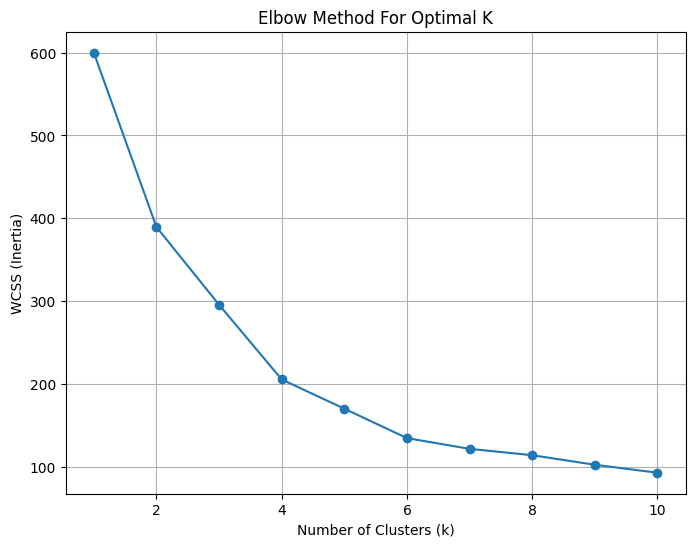

In [22]:
# Selecting features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
x = data[features]

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Elbow method to find optimal number of clusters
wcss_list = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x_scaled)
    wcss_list.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss_list, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  

y_predict= kmeans.fit_predict(x) 

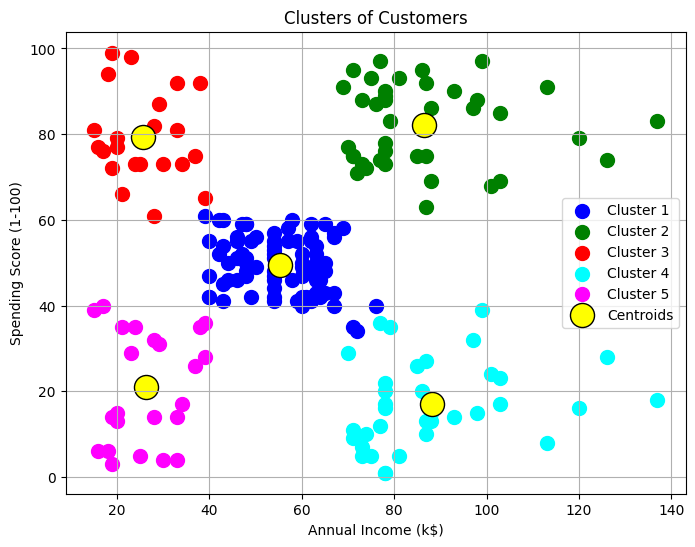

In [26]:
# Selecting features for visualization
features = ['Annual Income (k$)', 'Spending Score (1-100)']
x = data[features]

# Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(x_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(x.values[y_predict == 0, 0], x.values[y_predict == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(x.values[y_predict == 1, 0], x.values[y_predict == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(x.values[y_predict == 2, 0], x.values[y_predict == 2, 1], s=100, c='red', label='Cluster 3')
plt.scatter(x.values[y_predict == 3, 0], x.values[y_predict == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x.values[y_predict == 4, 0], x.values[y_predict == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plot centroids (inverse transform to get original scale)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', edgecolor='black')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Selecting only the numeric features to scale (excluding CustomerID)
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features_to_scale])

# Creating a DataFrame with scaled values and displaying statistics
scaled_df = pd.DataFrame(data_scaled, columns=features_to_scale)
print(scaled_df.describe())


                Age  Annual Income (k$)  Spending Score (1-100)
count  2.000000e+02        2.000000e+02            2.000000e+02
mean  -1.021405e-16       -2.131628e-16           -1.465494e-16
std    1.002509e+00        1.002509e+00            1.002509e+00
min   -1.496335e+00       -1.738999e+00           -1.910021e+00
25%   -7.248436e-01       -7.275093e-01           -5.997931e-01
50%   -2.045351e-01        3.587926e-02           -7.764312e-03
75%    7.284319e-01        6.656748e-01            8.851316e-01
max    2.235532e+00        2.917671e+00            1.894492e+00


In [9]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [10]:

# inertia on the fitted data
kmeans.inertia_

389.3861889564372

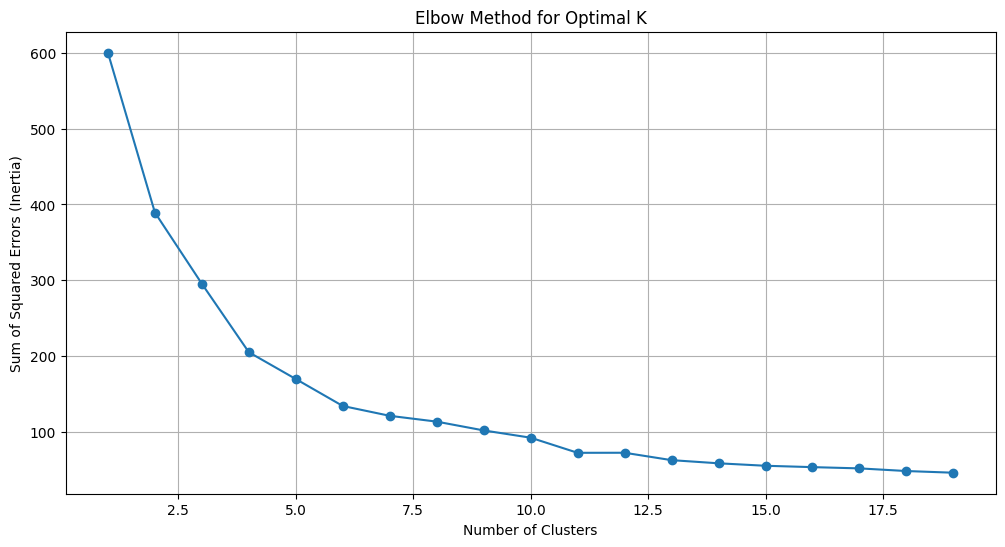

In [12]:
# Scaling the features (excluding CustomerID)
features_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features_to_scale])

# Fitting multiple k-means algorithms and storing SSE values
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# Plotting the results
frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


In [14]:
from sklearn.cluster import KMeans

# K-Means with 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# Predicting cluster labels
pred = kmeans.predict(data_scaled)

# Optional: adding the cluster labels to your original DataFrame
data['Cluster'] = pred

print(data)


     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          2  
1          2  
2          3  
3          2  
4          2

In [15]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
0    58
3    45
1    40
4    31
2    26
Name: count, dtype: int64